In [37]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import first
import thinkstats2
import thinkplot

I will work on "Does free thowrs made affect the points of players ?"

In [85]:
dataframe = pd.read_csv('basketball_players.csv')

In [86]:
players_ftMade = dataframe['ftMade'].dropna()
players_point = dataframe['points'].dropna()

In [87]:
print ("What I am working with the dataframe.")
print (" ")
print(players_point.describe()) 
print (" ")
print(players_ftMade.describe())

What I am working with the dataframe.
 
count    23751.000000
mean       492.130689
std        503.053318
min          0.000000
25%         81.000000
50%        329.000000
75%        758.500000
max       4029.000000
Name: points, dtype: float64
 
count    23751.000000
mean       101.443981
std        115.982538
min          0.000000
25%         15.000000
50%         60.000000
75%        148.000000
max        840.000000
Name: ftMade, dtype: float64


 HISTOGRAM

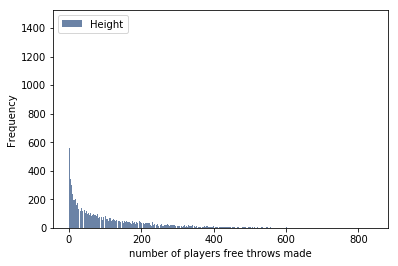

In [88]:
histogram = thinkstats2.Hist(players_ftMade,label="Player free throw made")
thinkplot.Hist(histogram)
thinkplot.Show(xlabel = 'number of players free throws made',ylabel="Frequency", loc='upper left' )

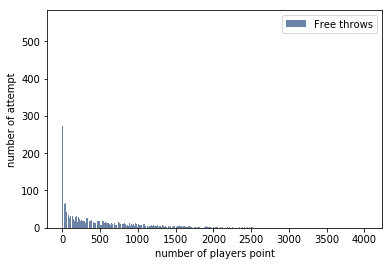

In [89]:
histogram_2 = thinkstats2.Hist(players_point,label='Free throws')
thinkplot.Hist(histogram_2)
thinkplot.Show(xlabel='number of players point',ylabel='number of attempt',label="upper right")

PMF

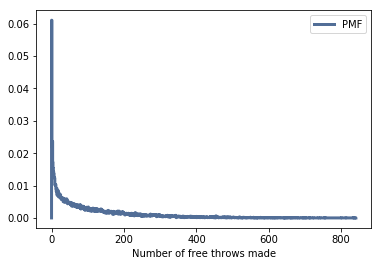

In [92]:
PMF = thinkstats2.Pmf(players_ftMade,label='PMF')
thinkplot.Pmf(PMF)
thinkplot.Show(xlabel= 'Number of free throws made', label ='top')

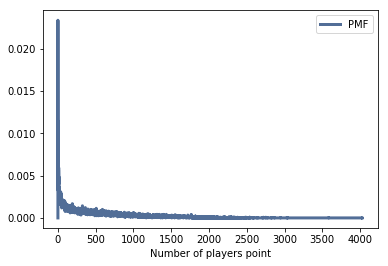

In [93]:
PMF_2 = thinkstats2.Pmf(players_point, label='PMF')
thinkplot.Pmf(PMF_2)
thinkplot.Show(xlabel= 'Number of players point',label='top')

CDF

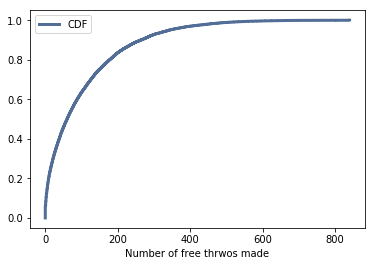

In [94]:
CDF= thinkstats2.Cdf(players_ftMade, label='CDF')
thinkplot.Cdf(CDF)
thinkplot.Show(xlabel= 'Number of free thrwos made',label= "top")

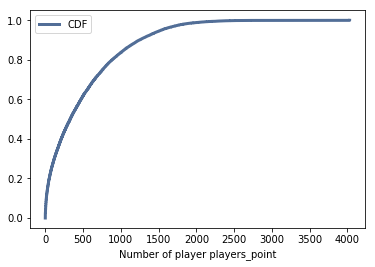

In [99]:
CDF_2= thinkstats2.Cdf(players_point, label="CDF")
thinkplot.Cdf(CDF_2)
thinkplot.Show(xlabel= "Number of player players_point", label = "top")

Histogram of 2 dataset (Players_height and Players_ftMade) 

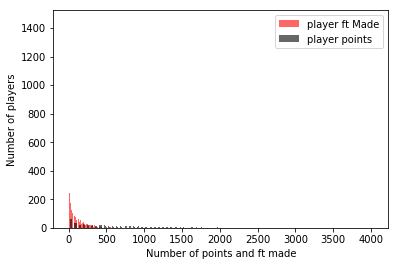

In [98]:
histogram = thinkstats2.Hist(players_ftMade, label = "player ft Made")
histogram_2 = thinkstats2.Hist(players_point, label = "player points")
thinkplot.Hist(histogram, color= "red",width = 0.9)
thinkplot.Hist(histogram_2, color = "black", width=0.5)
thinkplot.Show(xlabel= "Number of points and ft made",ylabel= "Number of players",label="upper left")


PMF of 2 datasets

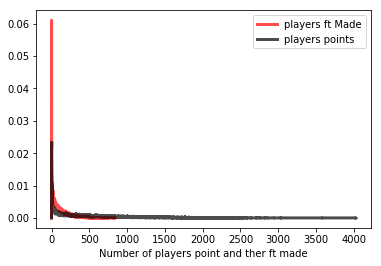

In [100]:
PMF = thinkstats2.Pmf(players_ftMade,label= "players ft Made")
PMF_2 = thinkstats2.Pmf(players_point, label = 'players points')
thinkplot.PrePlot(2)
thinkplot.Pmf(PMF, color= "red", align= 'right')
thinkplot.Pmf(PMF_2, color = "black", align= 'right')
thinkplot.Show(xlabel= "Number of players point and ther ft made", label= 'upper left')

CDF of 2 datasets

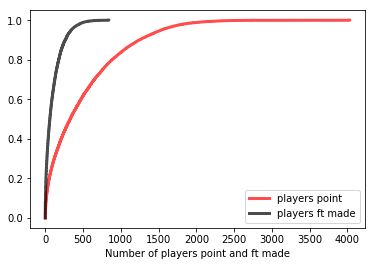

In [101]:
CDF = thinkstats2.Cdf(players_point, label= 'players point')
CDF_2 = thinkstats2.Cdf(players_ftMade, label= 'players ft made')
thinkplot.Cdf(CDF, color='red')
thinkplot.Cdf(CDF_2, color= 'black')
thinkplot.Show(xlabel= 'Number of players point and ft made',label='top')

In [102]:
point_mean, point_std = players_point.mean() , players_point.std()
print ('Mean of point :'+ " " + str(point_mean) )
print ('Std of point :' + " " + str(point_std))

Mean of point : 492.130689234
Std of point : 503.05331777


In [53]:
ftmade_mean , ftmade_std = players_ftMade.mean() , players_ftMade.std()
print ('Mean of ft made: '+" "+ str(ftmade_mean))
print('Std of the ft made: '+" "+ str(ftmade_std))

Mean of ft made:  101.443981306
Std of the ft made:  115.982537927


In [103]:
ftmade_mean , ftmade_std = players_ftMade.mean() , players_ftMade.std()
point_mean, point_std = players_point.mean() , players_point.std()

PDF = thinkstats2.NormalPdf(ftmade_mean, ftmade_std)
PDF_2 = thinkstats2.NormalPdf(point_mean, point_std)

def Median(xs):
    CDF = thinkstats2.Cdf(xs)
    return CDF.Value(0.5)

MEDIAN = Median(PDF)
MEDIAN_2 = Median(PDF_2)



print ('Median of Free throws Made :'  + str(MEDIAN))

print ('Median of Point :'  + str(MEDIAN_2))

print ('Density of Pdf of Free throws Made :' +str(PDF.Density(ftmade_mean+ ftmade_std)))

print ('Density of Pdf of Point :' +str(PDF_2.Density(point_mean+point_std)))

Median of Free throws Made :101.443981306
Median of Point :492.130689234
Density of Pdf of Free throws Made :0.0020862685784
Density of Pdf of Point :0.00048100413211


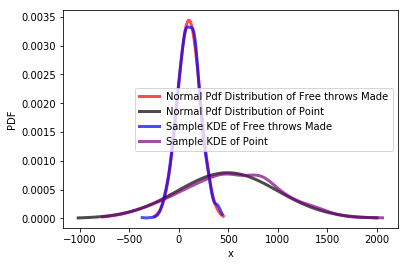

In [104]:
thinkplot.Pdf(PDF, label='Normal Pdf Distribution of Free throws Made',color='red')
thinkplot.Pdf(PDF_2, label='Normal Pdf Distribution of Point',color='black')

SAMPLE = np.random.normal(ftmade_mean, ftmade_std, 1000)
SAMPLE_2 = np.random.normal(point_mean, point_std, 1000)

PDF_SAMPLE = thinkstats2.EstimatedPdf(SAMPLE)
PDF_SAMPLE_2 = thinkstats2.EstimatedPdf(SAMPLE_2)

thinkplot.Pdf(PDF_SAMPLE, label='Sample KDE of Free throws Made',color='blue')
thinkplot.Pdf(PDF_SAMPLE_2, label='Sample KDE of Point',color='purple')

thinkplot.Show(xlabel='x', ylabel='PDF')

In [112]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print('Correlation is',Corr(players_point,players_ftMade)*100)

Correlation is 93.7150615465


In [114]:

print ('Covariance is ', Cov (players_ftMade,players_point)*100)

Covariance is  5467612.58424


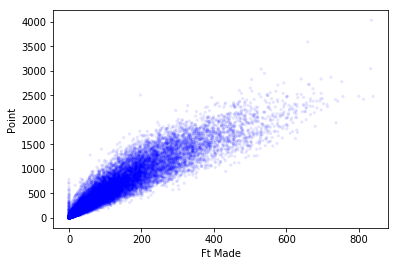

In [107]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Ft_made = Jitter(players_ftMade, 0.3)
Point = Jitter (players_point,0.3)

thinkplot.Scatter(Ft_made,Point, alpha=0.1, s=10)
thinkplot.Config(xlabel='Ft Made',
                 ylabel='Point',                 
                 legend=False)

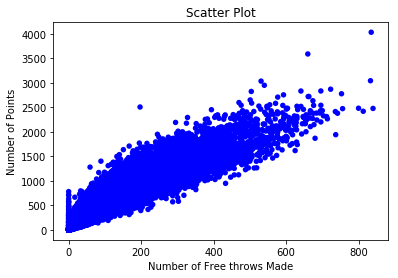

In [115]:
thinkplot.Scatter(players_ftMade, players_point, alpha=1)
thinkplot.Config(xlabel='Number of Free throws Made',
                 ylabel='Number of Points',
                 title="Scatter Plot",
                 legend=False)

In [79]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        Group, Group1 = data
        Test_start = abs(Group.mean() - Group1.mean())
        return Test_start

    def MakeModel(self):
        Group, Group1 = self.data
        self.x, self.y = len(Group), len(Group1)
        self.m = np.hstack((Group, Group1))

    def RunModel(self):
        np.random.shuffle(self.m)
        data = self.m[:self.x], self.m[self.x:]
        return data

In [108]:
data = players_point.values, players_ftMade.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The reported p-value is 0, which means that in 2000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. 
That means that the p-value is probably smaller than  1/10001/1000 , but it is not actually 0.


0.0


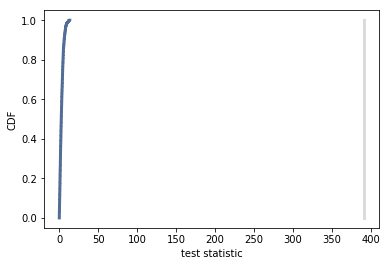

In [109]:
data = players_point.values, players_ftMade.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel='CDF')